# filters

In [20]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import feature
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

%matplotlib inline

In [23]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')

## 1. edge detection (выделение границ)
## 1.1. Стандартный фильтр для выделения скачков яркости

In [21]:
kernel_1 = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_2 = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0, -1, 0]])

In [24]:
res = convolve2d(img, kernel_1, mode = "valid")
res2 = convolve2d(img, kernel_2, mode = "valid")
#rgb2gray(

In [ ]:
def plot3(img1, img2, img3, title1, title2, title3):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                                    sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title(title2)

    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title(title3)

    fig.tight_layout()

    plt.show()


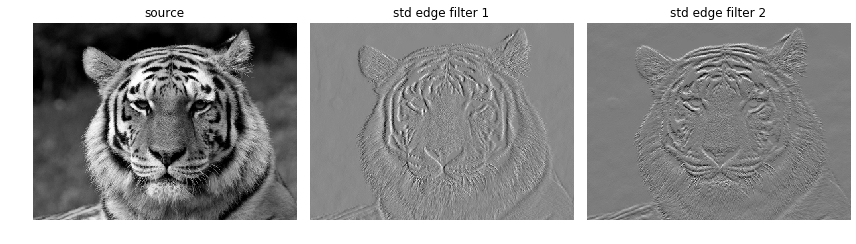

In [30]:

plt.show()

### фильтр Превитта

In [17]:
kernel_1 = np.array([[-1, 0, 1], 
                   [-1, 0, 1], 
                   [-1, 0, 1]])

kernel_2 = np.array([[1, 1, 1], 
                   [0, 0, 0], 
                   [-1, -1, -1]])

In [18]:
res = convolve2d(rgb2gray(img), kernel_1, mode = "valid")
res2 = convolve2d(rgb2gray(img), kernel_2, mode = "valid")

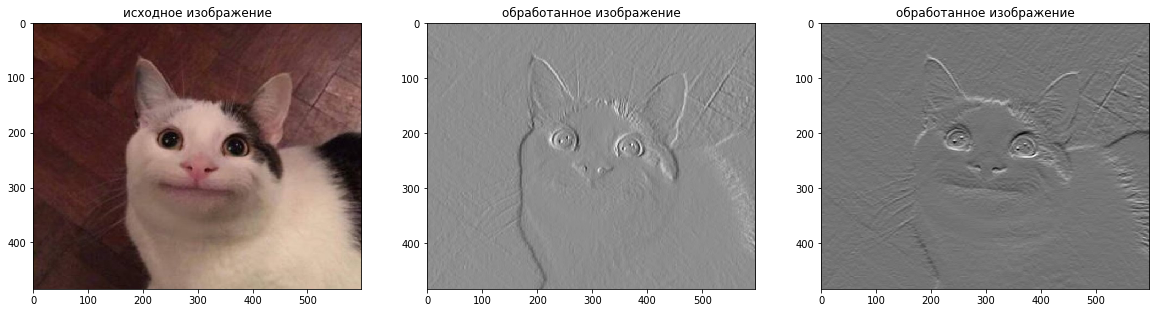

In [19]:
plt.figure(figsize=(20,10))
#plt.set_cmap(cmap="gray")
plt.subplot(1,3,1)
plt.title("исходное изображение")
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("обработанное изображение")
plt.imshow(res)
plt.subplot(1,3,3)
plt.title("обработанное изображение")
plt.imshow(res2)

plt.show()

### фильтр Собеля

In [35]:
kernel_1 = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]])

kernel_2 = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]])

In [36]:
res1 = convolve2d(rgb2gray(img), kernel_1, mode = "valid")
res2 = convolve2d(rgb2gray(img), kernel_2, mode = "valid")

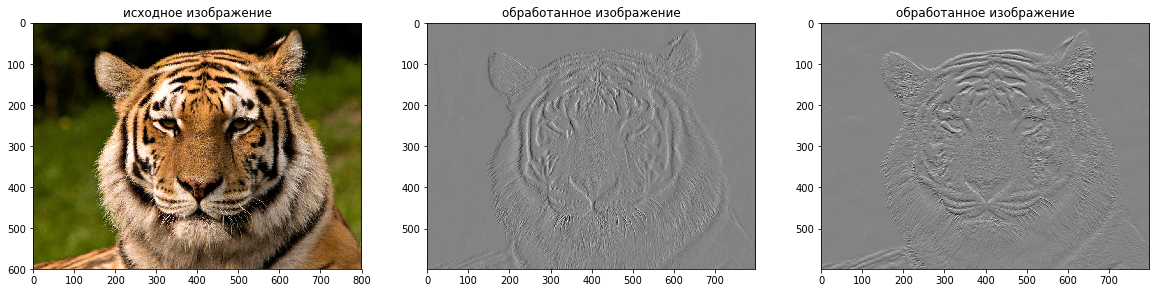

In [37]:
plt.figure(figsize=(20,10))
#plt.set_cmap(cmap="gray")
plt.subplot(1,3,1)
plt.title("исходное изображение")
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("обработанное изображение")
plt.imshow(res1)
plt.subplot(1,3,3)
plt.title("обработанное изображение")
plt.imshow(res2)

plt.show()

In [38]:
### Разностный аналог лапласиана

In [39]:
kernel_1 = np.array([[0, -1, 0], 
                   [-1, 4, -1], 
                   [0, -1, 0]])

kernel_2 = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

In [40]:
res1 = convolve2d(rgb2gray(img), kernel_1, mode = "valid")
res2 = convolve2d(rgb2gray(img), kernel_2, mode = "valid")

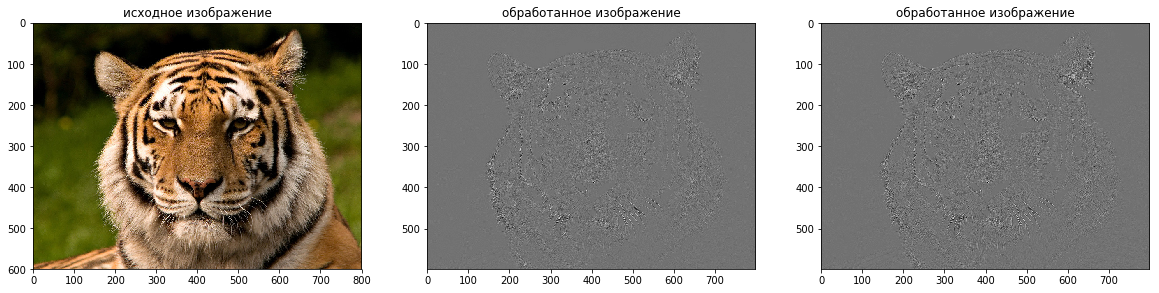

In [41]:
plt.figure(figsize=(20,10))
#plt.set_cmap(cmap="gray")
plt.subplot(1,3,1)
plt.title("исходное изображение")
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("обработанное изображение")
plt.imshow(res1)
plt.subplot(1,3,3)
plt.title("обработанное изображение")
plt.imshow(res2)

plt.show()

### emboss фильтр тиснения

In [43]:
kernel_1 = np.array([[2, 0, 0], 
                   [0, -1, 0], 
                   [0, 0, 1]])

In [44]:
res1 = convolve2d(rgb2gray(img), kernel_1, mode = "valid")

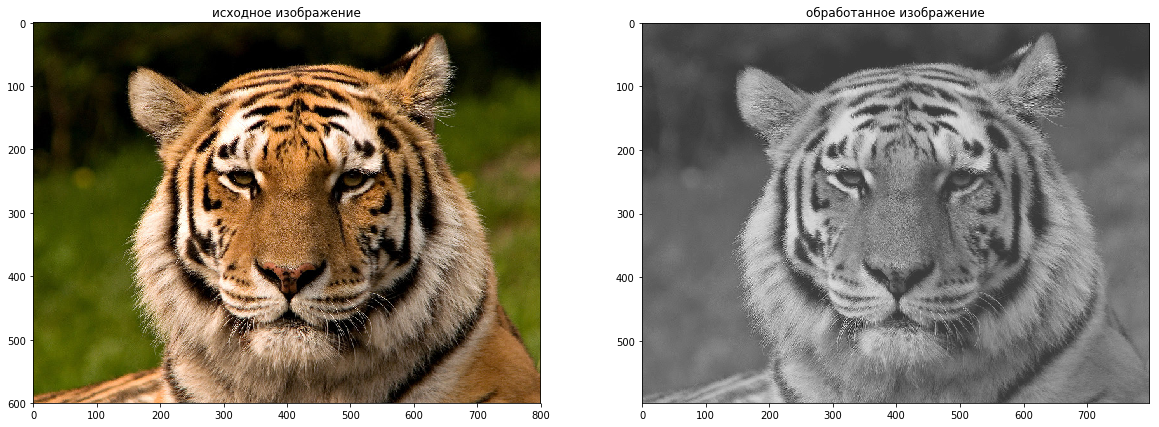

In [45]:
plt.figure(figsize=(20,10))
#plt.set_cmap(cmap="gray")
plt.subplot(1,2,1)
plt.title("исходное изображение")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("обработанное изображение")
plt.imshow(res1)

plt.show()

### фильтр повышения контрастности

In [46]:
kernel_1 = np.array([[-1, -1, -1], 
                   [-1, 9, -1], 
                   [-1, -1, -1]])

перевод в другую цветовую модель с отдельной контрасностью

In [47]:
r, g, b = [img[:, :, i] for i in range(3)]

In [48]:
r1 = convolve2d(r, kernel_1, mode = "valid")
g1 = convolve2d(g, kernel_1, mode = "valid")
b1 = convolve2d(b, kernel_1, mode = "valid")

In [52]:
r1 = np.clip(r1, 0, 255)
g1 = np.clip(g1, 0, 255)
b1 = np.clip(b1, 0, 255)

In [53]:
res1 = np.dstack((r1,g1,b1))

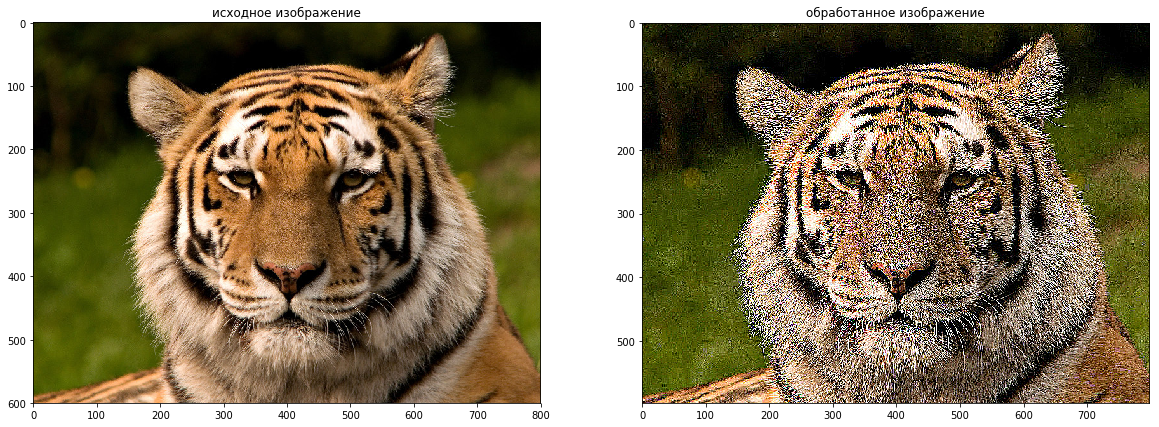

In [54]:
plt.figure(figsize=(20,10))
#plt.set_cmap(cmap="gray")
plt.subplot(1,2,1)
plt.title("исходное изображение")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("обработанное изображение")
plt.imshow(res1)

plt.show()

### Размытие

In [56]:
kernel_1 = np.array([[1, 1, 1], 
                   [1, 1, 1], 
                   [1, 1, 1]]) * 1/9

In [59]:
res1 = convolve2d(rgb2gray(img), kernel_1, mode = "valid")

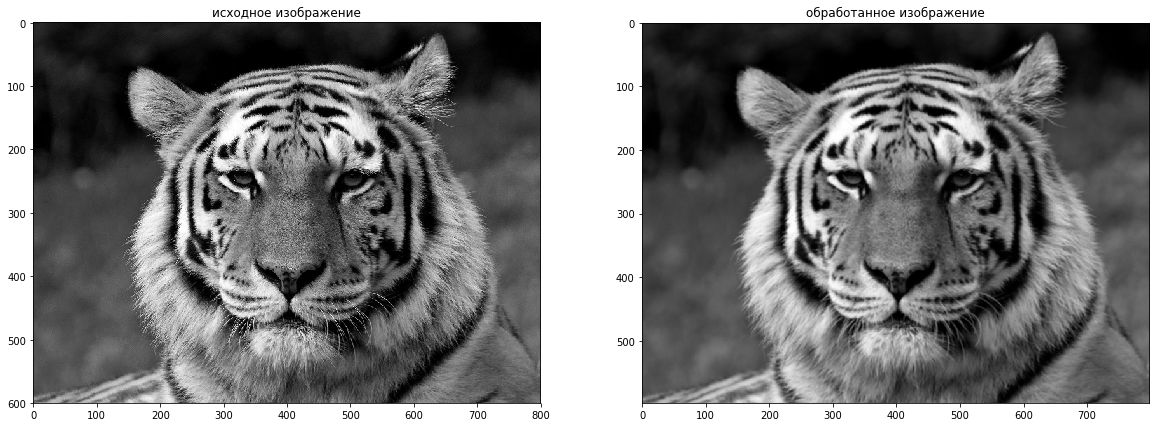

In [62]:
plt.figure(figsize=(20,10))
#plt.set_cmap(cmap="gray")
plt.subplot(1,2,1)
plt.title("исходное изображение")
plt.imshow(rgb2gray(img))
plt.subplot(1,2,2)
plt.title("обработанное изображение")
plt.imshow(res1)

plt.show()